# Lab 2 : Data Preprocessing & Feature Selection


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer 
import seaborn as sns

In [2]:
#Importing data file: Exercise-CarData.csv
data=pd.read_csv('Exercise-CarData.csv')

In [3]:
data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


# 1.Handling missing Data

## 1.1Removing null valudata.es

In [4]:
data.isna()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,True,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,True,False,False,False,False,False,False,False,False
1434,False,False,False,False,True,False,False,False,False,False,False


In [5]:
na_value=data.dropna()
na_value

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015


## 1.2 Imputation

In [8]:
print("\nData statistics:\n",data.describe())


Data statistics:
         Unnamed: 0         Price  ...           CC      Weight
count  1436.000000   1436.000000  ...  1436.000000  1436.00000
mean    717.500000  10730.824513  ...  1566.827994  1072.45961
std     414.681806   3626.964585  ...   187.182436    52.64112
min       0.000000   4350.000000  ...  1300.000000  1000.00000
25%     358.750000   8450.000000  ...  1400.000000  1040.00000
50%     717.500000   9900.000000  ...  1600.000000  1070.00000
75%    1076.250000  11950.000000  ...  1600.000000  1085.00000
max    1435.000000  32500.000000  ...  2000.000000  1615.00000

[8 rows x 6 columns]


In [9]:
# Replacing mean to column 1.CC, 2. Weight
data["Price"].fillna("10731", inplace = True)
data["Age"].fillna("55.67", inplace = True)
data["CC"].fillna("1567", inplace = True)
data["Weight"].fillna("1072", inplace = True)

In [10]:
# now again removing null data
data.isna()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,True,False,False,False,False,False,False


In [11]:
data.dropna()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1430,8450,80,23000,Petrol,86,0.0,0,1300,3,1015
1431,1431,7500,55.67,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,55.67,17016,Petrol,86,0.0,0,1300,3,1015


# 2. Data Transformation
## 2.1 Scaling

In [12]:
# data which we want to scale
# here we take "CC" and "Price"
X_new = data.iloc[:,[1,8]].values
print("\n\nX for transformation : \n", X_new)



X for transformation : 
 [[13500  2000]
 [13750  2000]
 [13950  2000]
 ...
 [ 8500  1300]
 [ 7250  1300]
 [ 6950  1600]]


In [13]:
#Performing scaling on "CC" and "Weight"

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.3250444  1.        ]
 [0.3339254  1.        ]
 [0.3410302  1.        ]
 ...
 [0.14742451 0.        ]
 [0.10301954 0.        ]
 [0.09236234 0.42857143]]


## 2.2 Mean-Normalization:

In [14]:
#taking "Age"
data1=data.dropna()
X_new2 = data1.iloc[:,2].values

print("\n\nX for transformation : \n", X_new2)



X for transformation : 
 [23.0 23.0 26.0 ... 72.0 '55.67' 76.0]


In [ ]:
m=55.6721 #mean of age
mx=80
mn=1
Z=[]
for i in X_new2:
    c=float(i)
    z=(c-55.6721)/79
    Z.append(z)
Z

## 2.3 Standardization (Z score):

In [16]:
# Step 5 : Perform standardization on age and salary

std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.76376268  2.31497633]
 [ 0.83271485  2.31497633]
 [ 0.88787659  2.31497633]
 ...
 [-0.6152808  -1.42599356]
 [-0.96004167 -1.42599356]
 [-1.04278428  0.17727925]]


##  2.4 Binarize Data (Make Binary)

In [17]:
# now using scaled data of price, we devide it in 2 catedories with assuming thresold=0.35

print("\n\nScaled X : \n", X_scaled[:,1])



Scaled X : 
 [1.         1.         1.         ... 0.         0.         0.42857143]


In [18]:
# thresolding price
A=X_scaled[:,1]
i=0.35 # thresold
Y=[]
for j in A:
    if(j>i):
        Y.append(1)
    else:
        Y.append(0)
Y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# 3. Handling Categorical Data
## 3.1  Label Encoding:

In [ ]:
#Seprate Input and Output attributes

# All rows, all columns except last 
data1=data.dropna()
X = data1.iloc[:,2:5].values 

print("\n\nInput : \n", X) 

In [20]:
# now we Label encode test data Fueltype

le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])
print("\n\nInput : \n", X) 




Input : 
 [[23.0 '46986' 1]
 [23.0 '72937' 1]
 [26.0 '48000' 1]
 ...
 [72.0 '??' 2]
 ['55.67' '17016' 2]
 [76.0 '1' 2]]


## 3.2 One Hot Encoding

In [21]:
# to create one column for each Fuel type

dummy = pd.get_dummies(data['FuelType'])
print("\n\nDummy :\n",dummy)
data = data.drop(['FuelType'],axis=1)
data = pd.concat([dummy,data],axis=1)
print("\n\nFinal Data :\n",data)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  ...  Automatic    CC  Doors Weight
0       0       1       0           0  ...          0  2000  three   1165
1       0       1       0           1  ...          0  2000      3   1165
2       0       1       0           2  ...          0  2000      3   1165
3       0       1       0           3  ...          0  2000      3   1165
4       0       1       0           4  ...          0  2000      3   1170
...   ...     ...     ...         ...  ...        ...   ...    ...    ...
1431    0       0       1        1431  ...          0  1300      3   1025
1432    0       0       1        1432  ...  

# 4. Feature Selection

In [22]:
df=data

In [23]:
df.head()

,CNG,Diesel,Petrol,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,0,13500,23,46986,90,1.0,0,2000,three,1165
1,0,1,0,1,13750,23,72937,90,1.0,0,2000,3,1165
2,0,1,0,2,13950,24,41711,90,NaN,0,2000,3,1165
3,0,1,0,3,14950,26,48000,90,0.0,0,2000,3,1165
4,0,1,0,4,13750,30,38500,90,0.0,0,2000,3,1170


In [24]:
data=df
data.head()

,CNG,Diesel,Petrol,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,0,13500,23,46986,90,1.0,0,2000,three,1165
1,0,1,0,1,13750,23,72937,90,1.0,0,2000,3,1165
2,0,1,0,2,13950,24,41711,90,NaN,0,2000,3,1165
3,0,1,0,3,14950,26,48000,90,0.0,0,2000,3,1165
4,0,1,0,4,13750,30,38500,90,0.0,0,2000,3,1170


In [25]:
data = data.iloc[:,[0,1,2,8,9,10,12]]
data.head()

,CNG,Diesel,Petrol,MetColor,Automatic,CC,Weight
0,0,1,0,1.0,0,2000,1165
1,0,1,0,1.0,0,2000,1165
2,0,1,0,NaN,0,2000,1165
3,0,1,0,0.0,0,2000,1165
4,0,1,0,0.0,0,2000,1170


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CNG        1436 non-null   uint8  
 1   Diesel     1436 non-null   uint8  
 2   Petrol     1436 non-null   uint8  
 3   MetColor   1286 non-null   float64
 4   Automatic  1436 non-null   int64  
 5   CC         1436 non-null   int64  
 6   Weight     1436 non-null   int64  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 49.2 KB


### Selecting features based on correlation
Generating the correlation matrix

In [27]:
corr = data.corr()
corr.head()

,CNG,Diesel,Petrol,MetColor,Automatic,CC,Weight
CNG,1.000000,-0.034300,-0.219022,0.003743,-0.024955,0.018141,0.051688
Diesel,-0.034300,1.000000,-0.711686,-0.015137,-0.081090,0.730292,0.516471
Petrol,-0.219022,-0.711686,1.000000,-0.006363,0.058664,-0.561913,-0.425511
MetColor,0.003743,-0.015137,-0.006363,1.000000,-0.013973,0.029189,0.057142
Automatic,-0.024955,-0.081090,0.058664,-0.013973,1.000000,-0.069321,0.057249


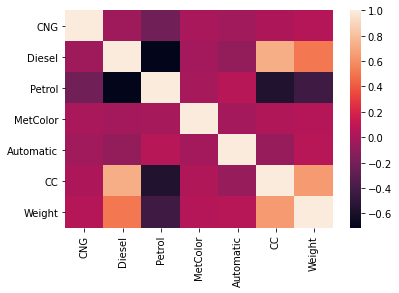

In [28]:
sns.heatmap(corr)

In [29]:
#Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.65
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.65:
            if columns[j]:
                columns[j] = False

In [30]:
columns

array([ True,  True,  True,  True,  True, False, False])

In [31]:
selected_columns = data.columns[columns]
selected_columns.shape

(5,)

In [32]:
data = data[selected_columns]
print(data)

      CNG  Diesel  Petrol  MetColor  Automatic
0       0       1       0       1.0          0
1       0       1       0       1.0          0
2       0       1       0       NaN          0
3       0       1       0       0.0          0
4       0       1       0       0.0          0
...   ...     ...     ...       ...        ...
1431    0       0       1       1.0          0
1432    0       0       1       0.0          0
1433    0       0       1       0.0          0
1434    0       0       0       1.0          0
1435    0       0       1       0.0          0

[1436 rows x 5 columns]
